# NanoAODplus_analyzer

In [1]:
import time

from coffea import hist
from coffea.analysis_objects import JaggedCandidateArray
import coffea.processor as processor
from awkward import JaggedArray
import numpy as np
from pprint import pprint

from nanoAODplus_processor.GenParticleProcessor import GenParticleProcessor

import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

In [2]:
tstart = time.time()

files = {'UpsilonDzero': ['sandbox/data/UpsilonDzero_GP.root']}

output = processor.run_uproot_job(files,
                                  treename='Events',
                                  processor_instance=GenParticleProcessor(),
                                  #executor=processor.iterative_executor,
                                  #executor_args={'flatten': True},
                                  executor=processor.futures_executor,
                                  #executor_args={'workers': 6, 'flatten': True},
                                  executor_args={'workers': 8, 'flatten': True},
                                  chunksize=100000,
                                 )

elapsed = time.time() - tstart
print(output)


{'Muon_pt': <Hist (dataset,pt) instance at 0x7f01d3c44908>, 'Muon_eta': <Hist (dataset,eta) instance at 0x7f0213e3abe0>, 'Muon_phi': <Hist (dataset,phi) instance at 0x7f01afe3f198>, 'Upsilon_mass': <Hist (dataset,mass) instance at 0x7f01afe3f240>, 'Upsilon_pt': <Hist (dataset,pt) instance at 0x7f01afe3ff98>, 'Upsilon_eta': <Hist (dataset,eta) instance at 0x7f01afe3ff28>, 'Upsilon_phi': <Hist (dataset,phi) instance at 0x7f01afe45240>, 'D0_mass': <Hist (dataset,mass) instance at 0x7f01afe45e10>, 'D0_pt': <Hist (dataset,pt) instance at 0x7f01afe45278>, 'D0_eta': <Hist (dataset,eta) instance at 0x7f01afe45a20>, 'D0_phi': <Hist (dataset,phi) instance at 0x7f01afe458d0>, 'cutflow': defaultdict(<class 'int'>, {})}


(0.0, 15.0)

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


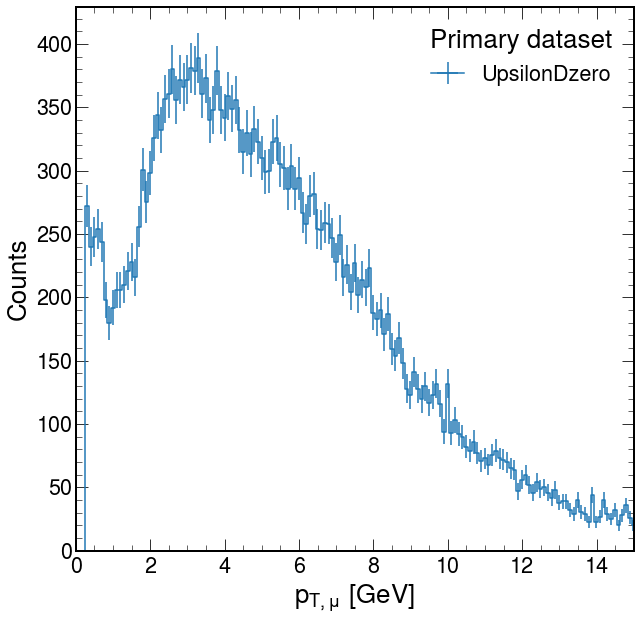

In [3]:
ax = hist.plot1d(output['Muon_pt'], overlay='dataset')
ax.set_xlim(0,15)

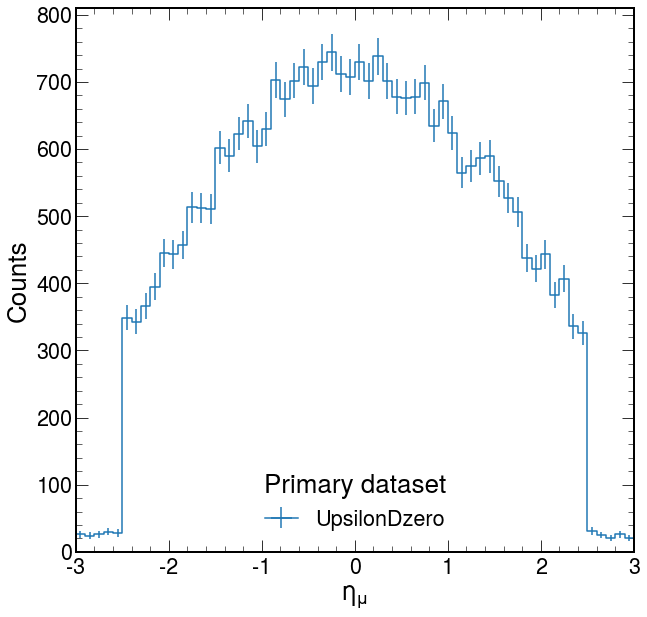

In [4]:
ax = hist.plot1d(output['Muon_eta'], overlay='dataset')

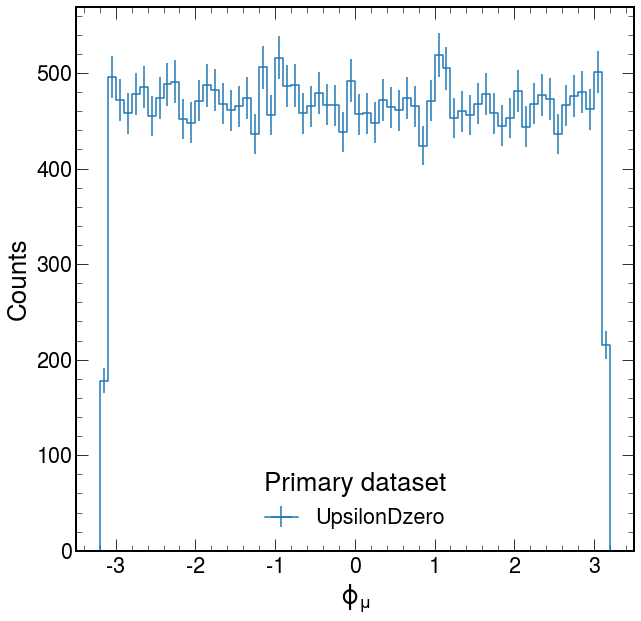

In [5]:
ax = hist.plot1d(output['Muon_phi'], overlay='dataset')

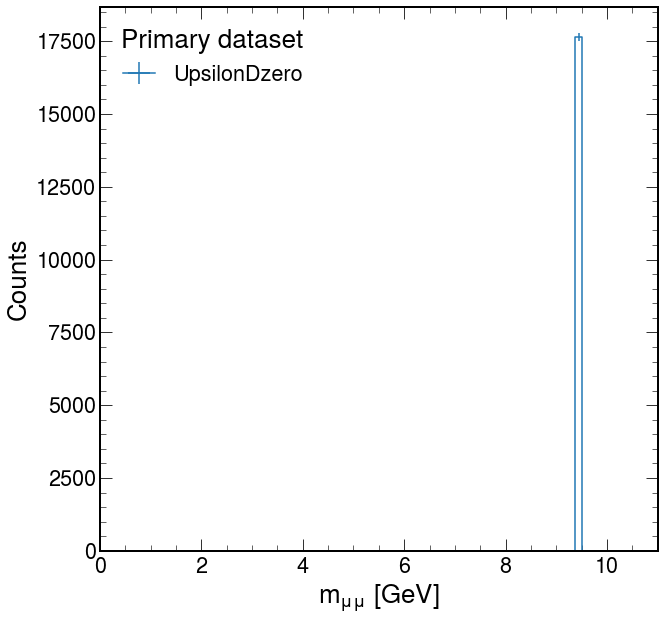

In [6]:
ax = hist.plot1d(output['Upsilon_mass'], overlay='dataset')

(0.0, 20.0)

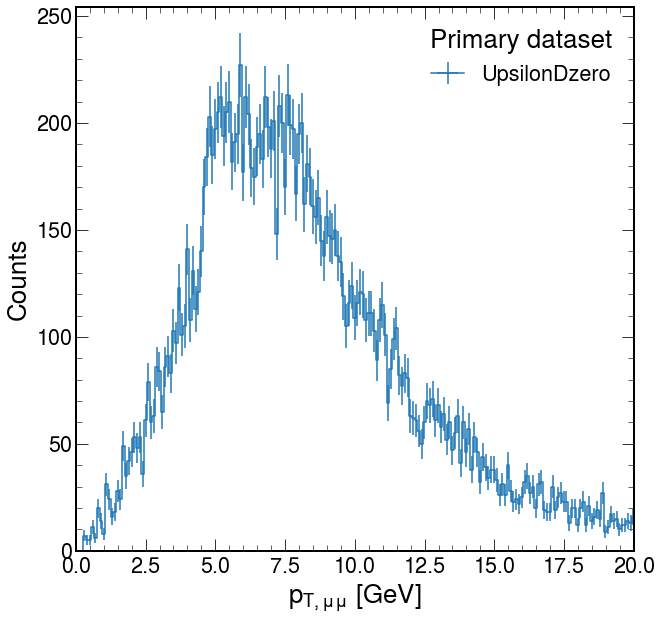

In [7]:
ax = hist.plot1d(output['Upsilon_pt'], overlay='dataset')
ax.set_xlim(0,20)

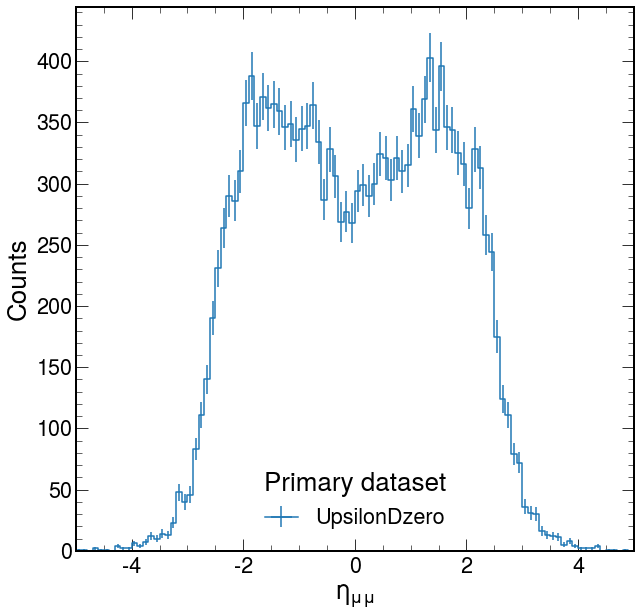

In [8]:
ax= hist.plot1d(output['Upsilon_eta'], overlay='dataset')

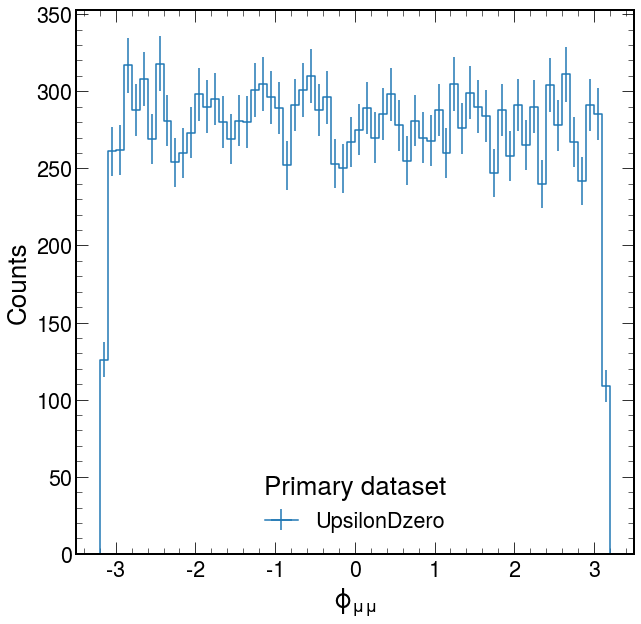

In [9]:
ax= hist.plot1d(output['Upsilon_phi'], overlay='dataset')

(1.0, 2.5)

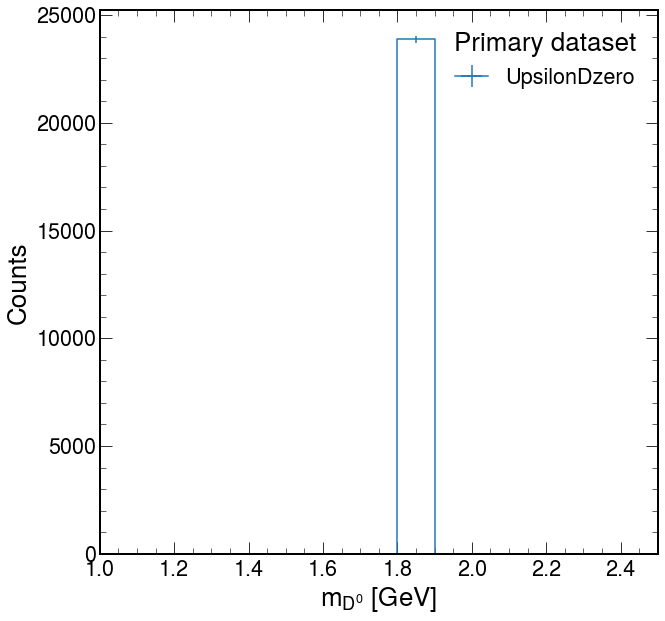

In [10]:
ax= hist.plot1d(output['D0_mass'], overlay='dataset')
ax.set_xlim(1.0,2.5)

(0.0, 10.0)

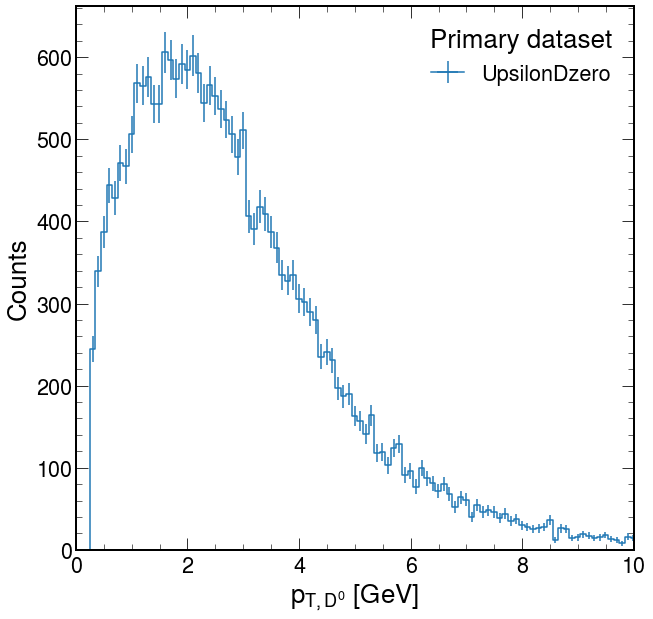

In [11]:
ax= hist.plot1d(output['D0_pt'], overlay='dataset')
ax.set_xlim(0,10)

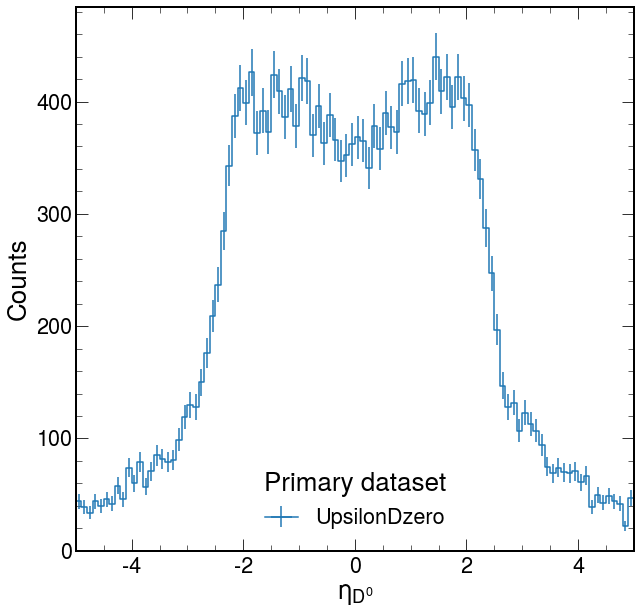

In [12]:
ax= hist.plot1d(output['D0_eta'], overlay='dataset')

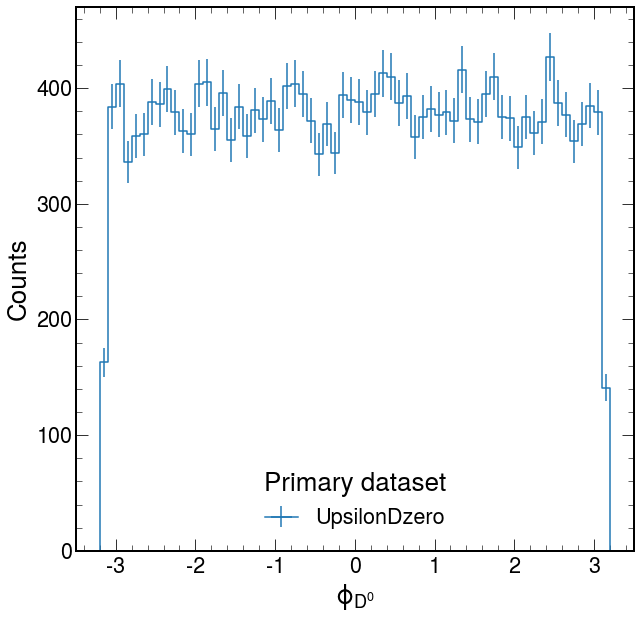

In [13]:
ax= hist.plot1d(output['D0_phi'], overlay='dataset')

In [ ]:
import uproot

branches = ['nGenPart', 'GenPart_pt', 'GenPart_eta', 'GenPart_phi', 'GenPart_mass', 'GenPart_charge', 'GenPart_pdgId']
file = ['data/UpsilonDzero_GP.root']

for chunk in uproot.iterate(file, 'Events', branches=branches, entrysteps=500000, namedecode='ascii'):
    GenParticle = JaggedCandidateArray.candidatesfromcounts(chunk['nGenPart'],
                                            pt=chunk['GenPart_pt'].content,
                                            eta=chunk['GenPart_eta'].content,
                                            phi=chunk['GenPart_phi'].content,
                                            mass=chunk['GenPart_mass'].content,
                                            charge=chunk['GenPart_charge'].content,
                                            pdgId=chunk['GenPart_pdgId'].content,
                                           )

In [ ]:
GenParticle.pdgId